   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Data Types:
sepal_length    float64
sepal_width     fl

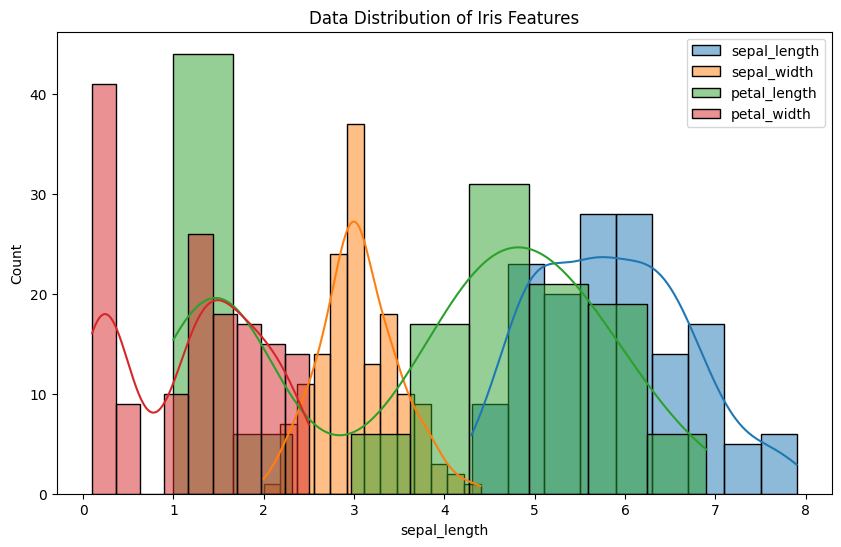

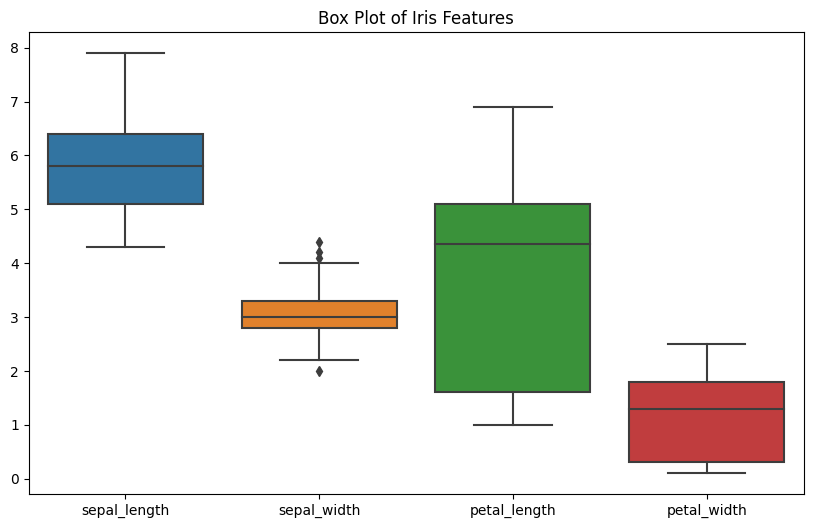

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


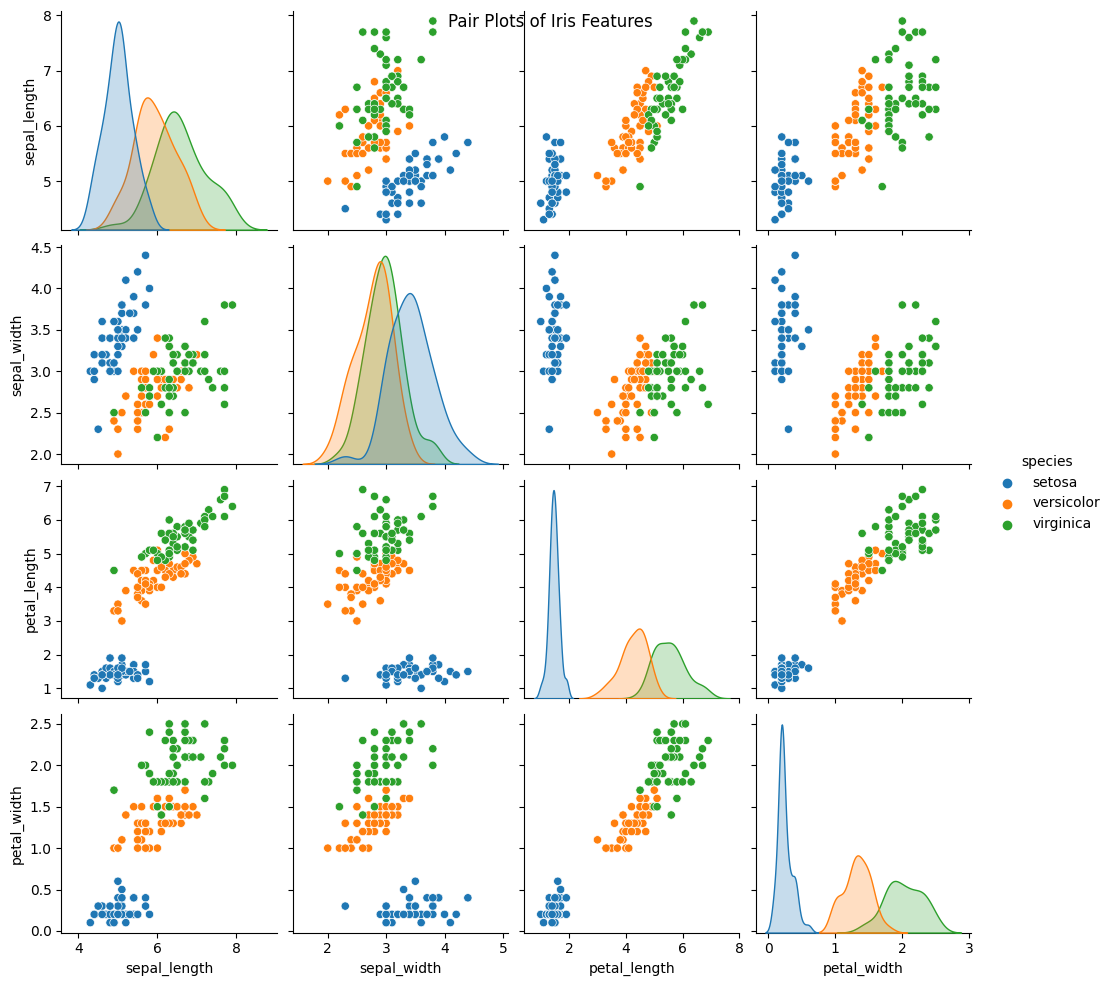

In [2]:
#2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris_data = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris_data.head())

# Get summary statistics of the dataset
print("\nSummary Statistics:")
summary_stats = iris_data.describe()
print(summary_stats)

# Check the data types of each column
print("\nData Types:")
data_types = iris_data.dtypes
print(data_types)

# Visualize the data distribution using histograms
plt.figure(figsize=(10, 6))
for column in iris_data.columns[:-1]:  # Excluding the target column 'species'
    sns.histplot(iris_data[column], kde=True, label=column)
plt.title('Data Distribution of Iris Features')
plt.legend()
plt.show()

# Visualize the data distribution using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_data)
plt.title('Box Plot of Iris Features')
plt.show()

# Visualize pair plots for all combinations of features
sns.pairplot(iris_data, hue='species', diag_kind='kde')
plt.suptitle('Pair Plots of Iris Features')
plt.show()




In [3]:
#3
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# 1. Handle Missing Values (not applicable for this dataset)

# 2. Outlier Detection and Handling using IQR method
def detect_and_handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_outliers_removed = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_outliers_removed

# Assuming the 'sepal_length' and 'sepal_width' have potential outliers
iris = detect_and_handle_outliers(iris, 'sepal_length')
iris = detect_and_handle_outliers(iris, 'sepal_width')

# 3. Feature Engineering (not required for this dataset)

# Display the first few rows of the preprocessed dataset
print(iris.head())

# Save the preprocessed data to a new CSV file if needed
# iris.to_csv('preprocessed_iris_dataset.csv', index=False)



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
#4
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Prepare the data for modeling
X = iris.drop('species', axis=1)
y = iris['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Classifier Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# 2. Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred_rf = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Support Vector Machine (SVM) Classifier Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest Classifier Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [

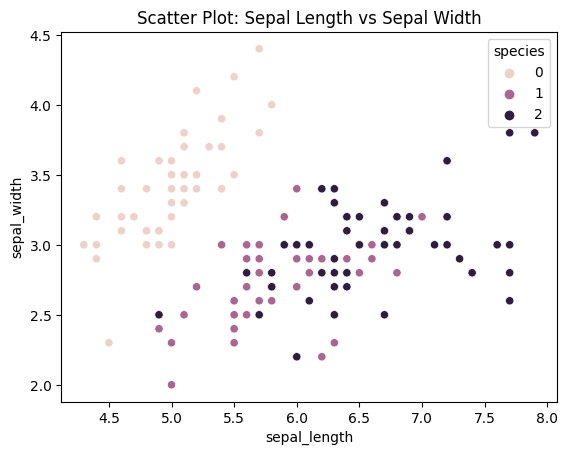

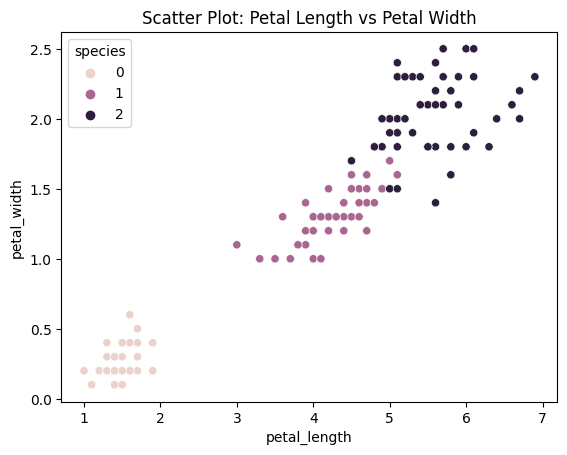

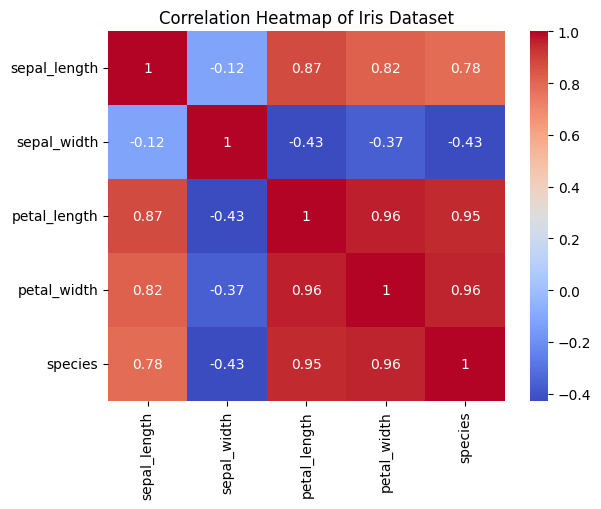

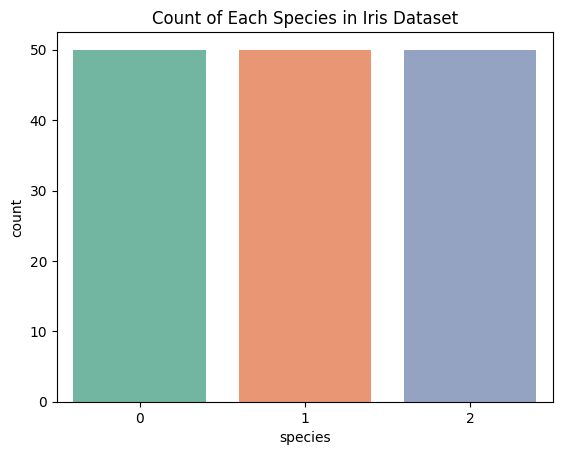

In [6]:
#5
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Convert the 'species' column to numerical labels
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species'] = iris['species'].map(species_mapping)

# Scatter plot for sepal_length vs sepal_width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.show()

# Scatter plot for petal_length vs petal_width
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.title('Scatter Plot: Petal Length vs Petal Width')
plt.show()

# Heatmap to visualize the correlation between features
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

# Bar chart for the count of each species
sns.countplot(x='species', data=iris, palette='Set2')
plt.title('Count of Each Species in Iris Dataset')
plt.show()



In [ ]:
#6
